In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline

In [2]:
cd = pd.read_csv('Classified Data')

In [3]:
cd.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scalar = StandardScaler()

In [6]:
scalar.fit(cd.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scalar.transform(cd.drop('TARGET CLASS',axis=1))

In [8]:
dat1 = pd.DataFrame(scaled_features,columns=cd.columns[:-1])
dat1.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,cd['TARGET CLASS'], test_size=0.33, random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print('for k=1')
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))


for k=1
[[159  14]
 [ 14 143]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.91      0.91       157

    accuracy                           0.92       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330



In [17]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i  = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    

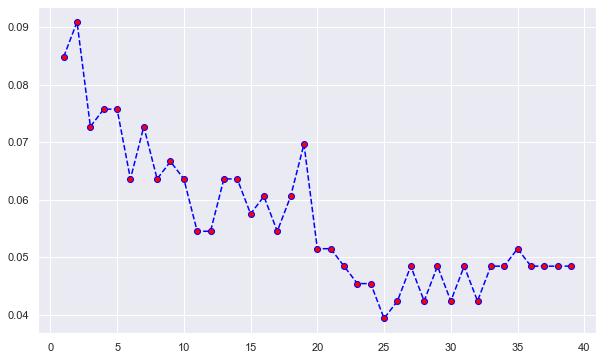

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color= 'blue',linestyle = 'dashed',marker ='o',markerfacecolor='red')

In [20]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('for k=17')
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))


for k=17
[[165  12]
 [  8 145]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       177
           1       0.92      0.95      0.94       153

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [21]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('for k=18')
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))


for k=18
[[167  14]
 [  6 143]]


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       181
           1       0.91      0.96      0.93       149

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

